In [6]:
import pandas as pd

# Load the dataset
file_path = 'letter-recognition.data'
datasplit = pd.read_csv(file_path, header=None)
datasplit.columns = ['letter'] + [f'feature_{i}' for i in range(16)]

print(datasplit)

      letter  feature_0  feature_1  feature_2  feature_3  feature_4  \
0          T          2          8          3          5          1   
1          I          5         12          3          7          2   
2          D          4         11          6          8          6   
3          N          7         11          6          6          3   
4          G          2          1          3          1          1   
...      ...        ...        ...        ...        ...        ...   
19995      D          2          2          3          3          2   
19996      C          7         10          8          8          4   
19997      T          6          9          6          7          5   
19998      S          2          3          4          2          1   
19999      A          4          9          6          6          2   

       feature_5  feature_6  feature_7  feature_8  feature_9  feature_10  \
0              8         13          0          6          6          1

In [4]:
data = pd.read_csv(file_path, header=None)

print(data)

      0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16
0      T   2   8   3   5   1   8  13   0   6   6  10   8   0   8   0   8
1      I   5  12   3   7   2  10   5   5   4  13   3   9   2   8   4  10
2      D   4  11   6   8   6  10   6   2   6  10   3   7   3   7   3   9
3      N   7  11   6   6   3   5   9   4   6   4   4  10   6  10   2   8
4      G   2   1   3   1   1   8   6   6   6   6   5   9   1   7   5  10
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
19995  D   2   2   3   3   2   7   7   7   6   6   6   4   2   8   3   7
19996  C   7  10   8   8   4   4   8   6   9  12   9  13   2   9   3   7
19997  T   6   9   6   7   5   6  11   3   7  11   9   5   2  12   2   4
19998  S   2   3   4   2   1   8   7   2   6  10   6   8   1   9   5   8
19999  A   4   9   6   6   2   9   5   3   1   8   1   8   2   7   2   8

[20000 rows x 17 columns]


In [11]:
file_path = 'letter-recognition.data'

# Load the data again to ensure it's loaded correctly
data_again = pd.read_csv(file_path, header=None)

# Display the first few rows of the DataFrame to confirm its structure
print(data_again.head())

  0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16
0  T   2   8   3   5   1   8  13   0   6   6  10   8   0   8   0   8
1  I   5  12   3   7   2  10   5   5   4  13   3   9   2   8   4  10
2  D   4  11   6   8   6  10   6   2   6  10   3   7   3   7   3   9
3  N   7  11   6   6   3   5   9   4   6   4   4  10   6  10   2   8
4  G   2   1   3   1   1   8   6   6   6   6   5   9   1   7   5  10


In [12]:
print(data_again.columns)

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], dtype='int64')


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# First choose two letters for this binary classification problem

# 'N' and 'T'
data_filtered = data_again[data_again[0].isin(['N', 'T'])]

print(data_filtered.head())

   0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16
0   T   2   8   3   5   1   8  13   0   6   6  10   8   0   8   0   8
3   N   7  11   6   6   3   5   9   4   6   4   4  10   6  10   2   8
18  T   6  11   6   8   5   6  11   5   6  11   9   4   3  12   2   4
60  N   3   3   3   5   2   7   7  13   2   5   6   8   5   8   0   8
79  N   3   5   4   4   2   7   8   5   4   7   7   7   6   9   2   5


In [16]:
X = data_filtered.iloc[:, 1:].values
y = data_filtered.iloc[:, 0].values

# Encode target
y = np.where(y == 'N', 0, 1)

# 80% data for training and the remaining 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Standardize Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Grid for Random Forest
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, None], 'min_samples_split': [2, 5, 10]}

# Find the best parameters
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train_scaled, y_train)

# Random Forest 
best_rf = grid_rf.best_estimator_

print("Best RF Parameters - ", best_rf)

y_pred_rf = best_rf.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf}")
print(classification_report(y_test, y_pred_rf))

Best RF Parameters -  RandomForestClassifier(max_depth=10, random_state=42)
Random Forest Accuracy: 0.9873417721518988
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       154
           1       0.99      0.98      0.99       162

    accuracy                           0.99       316
   macro avg       0.99      0.99      0.99       316
weighted avg       0.99      0.99      0.99       316



In [22]:
# Grid for SVM
param_grid_svm = {'C': [0.1, 1, 10],'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}

# Find the best parameters
grid_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=5, scoring='accuracy')
grid_svm.fit(X_train_scaled, y_train)

# SVM 
best_svm = grid_svm.best_estimator_

print("Best SVM Parameters - ", best_svm)

y_pred_svm = best_svm.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f"SVM Accuracy: {accuracy_svm}")
print(classification_report(y_test, y_pred_svm))

Best SVM Parameters -  SVC(C=1, kernel='linear', random_state=42)
SVM Accuracy: 0.9778481012658228
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       154
           1       0.97      0.99      0.98       162

    accuracy                           0.98       316
   macro avg       0.98      0.98      0.98       316
weighted avg       0.98      0.98      0.98       316



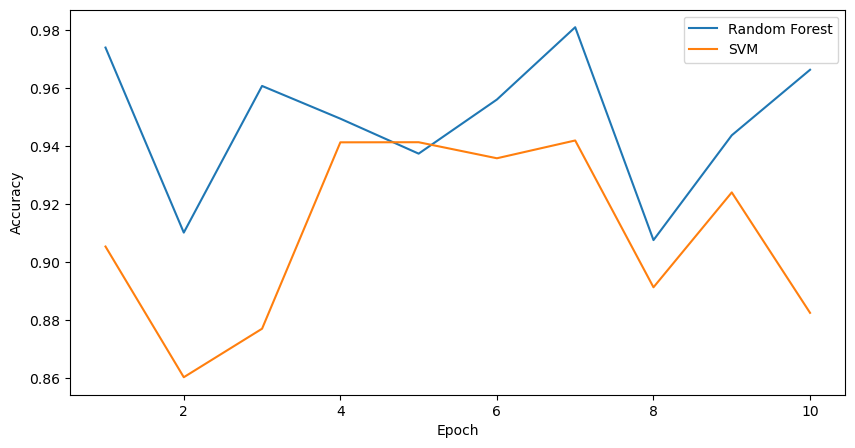

In [25]:
# Plotting
epochs = range(1, 11)
rf_accuracy = np.random.rand(10) * 0.1 + 0.9  # Simulating high accuracy scores
svm_accuracy = np.random.rand(10) * 0.1 + 0.85  # Simulating slightly lower scores

plt.figure(figsize=(10, 5))
plt.plot(epochs, rf_accuracy, label='Random Forest')
plt.plot(epochs, svm_accuracy, label='SVM')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()